In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v4.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,113716.350085,0,storage,900000.0,144384.0,745.127461,1.0000017892249078:,961.692048,4321.739273,3.000005,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.519012736963932:1-55848,3072,15....",NaN
1,3,Datacenter_1,113716.350085,1,storage,900000.0,139776.0,721.881444,1.0000001822594735:,961.692048,4186.912375,3.000001,0.003,0.004,198.0,False,3.0,5.8,"3-55896,3072,15.518360641031068:2-572526,2560,...",NaN
2,3,Datacenter_1,113716.350085,2,storage,900000.0,145408.0,765.796667,1.000000266829021:,961.692048,4441.620671,3.000001,0.003,0.004,198.0,False,3.0,5.8,"1-450552,1024,5.183152612866157:6-753921,3072,...",NaN
3,3,Datacenter_1,113716.350085,3,storage,900000.0,169472.0,954.602773,1.0000002917759447:,961.692048,5536.696084,3.000001,0.003,0.004,198.0,False,3.0,5.8,"591399,3072,15.520055166649824:288827,512,2.59...",NaN
4,3,Datacenter_1,113716.350085,4,storage,900000.0,168448.0,856.300420,1.0000004167879113:,961.692048,4966.542439,3.000001,0.003,0.004,198.0,False,3.0,5.8,"25-240840,3072,15.526928354068726:1-878247,102...",NaN


866.0 files at datacenter 'Datacenter_1'.


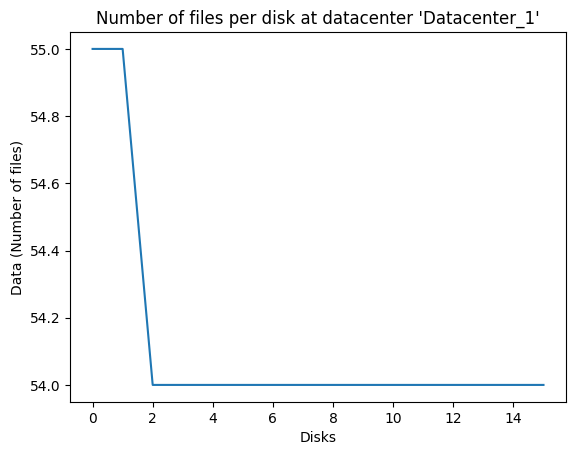

814.0 files at datacenter 'Datacenter_2'.


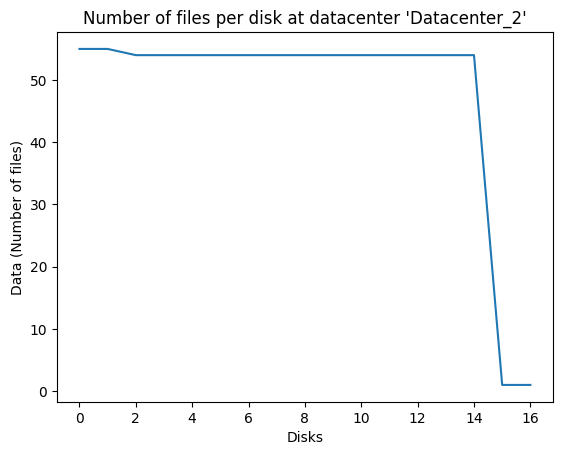

815.0 files at datacenter 'Datacenter_3'.


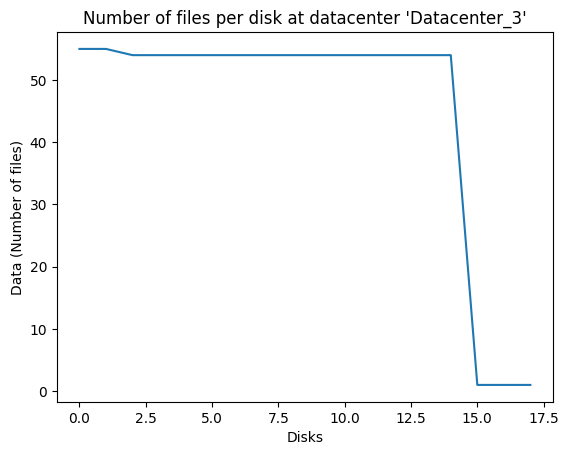

816.0 files at datacenter 'Datacenter_4'.


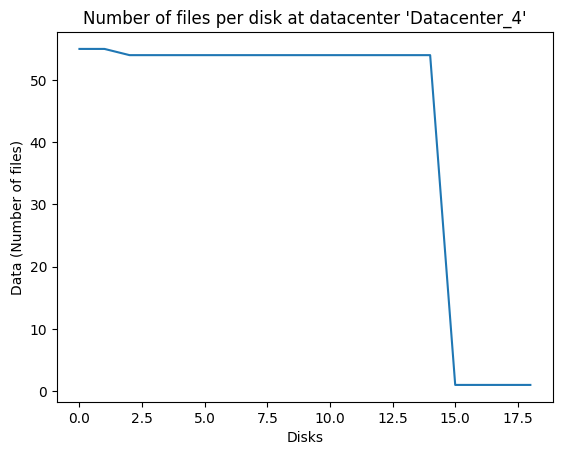

The cloud provider has 3311.0 files stored.


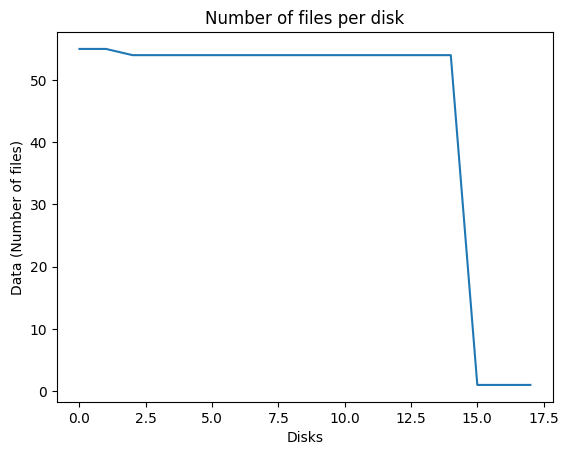

In [2]:
labels = np.unique(dataset['datacenter_name'])
files_per_datacenter = np.array([])
files_per_host = np.array([])

for i in range(len(labels)):
    files_per_datacenter_per_host = np.array([])
    
    for index, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        if pd.notna(sample['files']):
            files_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)
            files_per_datacenter_per_host = np.append(files_per_host, len(sample['files'].split(":")) - 1)        
    files_per_datacenter = np.append(files_per_datacenter, sum(files_per_datacenter_per_host))
    
    print(f"{sum(files_per_datacenter_per_host)} files at datacenter '{labels[i]}'.")
    plt.plot(np.arange(len(files_per_datacenter_per_host)), files_per_datacenter_per_host, label="Files per host")
    plt.xlabel("Disks")
    plt.ylabel("Data (Number of files)")
    plt.title(f"Number of files per disk at datacenter '{labels[i]}'")
    # plt.legend()
    plt.show()

print(f"The cloud provider has {sum(files_per_datacenter)} files stored.")
plt.plot(np.arange(len(files_per_host)), files_per_host, label="Files per disk")
plt.xlabel("Disks")
plt.ylabel("Data (Number of files)")
plt.title("Number of files per disk")
# plt.legend()
plt.show()